In [1]:
#Librerias matematicas
import pandas as pd
import numpy as np
#Libreria representacion
import matplotlib.pyplot as plt
import seaborn as sns
#Librerias de twitter
import tweepy
from tweepy import OAuthHandler
#Librerias tratar inet
import json
import re
import os
from dotenv import load_dotenv
from collections import Counter

import time
import csv
#Representar mapas
import folium
#Representar imagenes
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#Vectorizar,polarizar y tokenizar palabras
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

#Funciones delacasa
from src.inputs import *


### Este jupyternotebook es para iniciar  la extraccion de datos y poder ir representando graficamente todo el proceso.

In [2]:
load_dotenv()


CONSUMER_KEY = os.getenv("consumer_key")
CONSUMER_SECRET = os.getenv("consumer_secret")
ACCESS_TOKEN = os.getenv("access_token")
ACCESS_SECRET = os.getenv("access_token_secret")

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

user=api.me()
print(user.name,",", user.screen_name)

卡西亚 , nadie_me_tiene


In [3]:
#("Preparandome para el trabajo final de IronHack")
#https://twitter.com/nadie_me_tiene/status/1313883047469686790

### Extraigo tweets gracias a la api, configuro la extraccion para que me devuelva el nombre del usuario que lo escribe,  su localizacion,  contador de gente que le sigue, contador de amigos , el mensaje en si, las coordenadas desde donde se escribio el mensaje, nombre completo del lugar, pais, codigo del pais y el tipo de dispositivo desde donde se escribio

In [4]:
'''start_time = time.time()

max_id = -300000
tweetsPerQry = 1000  
search_words = '(@JoeBiden OR @DonaldTrump OR Donald Trump OR Joe Biden)'
date_since = "2020-09-29" 

# append data
csvFile = open(search_words + '_data4.csv', 'w', encoding='utf-8')

#csv Writer
csvWriter = csv.writer(csvFile)

#get data
tweet_num = 0
for tweet in tweepy.Cursor(
                        api.search,
                        q=search_words + ' -RT',
                        count=tweetsPerQry,
                        lang="en", 
                        since=date_since, max_id=str(max_id - 1)).items(9999999999):https://www.youtube.com/watch?v=WtSZ8ecMCY8
    if tweet.place is not None:
        try:
            print ('tweet number: {}'.format(tweet_num), tweet.text, tweet.place.full_name)
            # write data
            csvWriter.writerow([tweet.created_at,
                                tweet.user.screen_name,
                                tweet.user.location,
                                tweet.user.followers_count,
                                tweet.user.friends_count,
                                tweet.text,
                                tweet.place.bounding_box.coordinates,
                                tweet.place.full_name,
                                tweet.place.country,
                                tweet.place.country_code,
                                tweet.place.place_type])
            tweet_num += 1
            
        except :
            continue

print("--- %s seconds ---" % (time.time() - start_time))
'''

'start_time = time.time()\n\nmax_id = -300000\ntweetsPerQry = 1000  \nsearch_words = \'(@JoeBiden OR @DonaldTrump OR Donald Trump OR Joe Biden)\'\ndate_since = "2020-09-29" \n\n# append data\ncsvFile = open(search_words + \'_data4.csv\', \'w\', encoding=\'utf-8\')\n\n#csv Writer\ncsvWriter = csv.writer(csvFile)\n\n#get data\ntweet_num = 0\nfor tweet in tweepy.Cursor(\n                        api.search,\n                        q=search_words + \' -RT\',\n                        count=tweetsPerQry,\n                        lang="en", \n                        since=date_since, max_id=str(max_id - 1)).items(9999999999):https://www.youtube.com/watch?v=WtSZ8ecMCY8\n    if tweet.place is not None:\n        try:\n            print (\'tweet number: {}\'.format(tweet_num), tweet.text, tweet.place.full_name)\n            # write data\n            csvWriter.writerow([tweet.created_at,\n                                tweet.user.screen_name,\n                                tweet.user.location,\

In [5]:
#Defino las columnas que voy a utilizar y paso la informacion a un CSV
col_names=['date','user_name','user_loc','followers','friends','message','bbox_coords',\
           'full_name','country','country_code','place_type']
df2= pd.read_csv('./Outputs/(@JoeBiden OR @DonaldTrump OR Donald Trump OR Joe Biden)_data3.csv', names=col_names)
print(df2.shape)
df2.head()
#Tras un exitoso web scrapping consigo rascar 2300 tweets

(2505, 11)


date        user_name                    user_loc followers  \
0  2020-10-10 11:41:36  susanha77835097                Florida, USA         2   
1  2020-10-10 11:19:05       tomborelli               Greenwich, CT     32169   
2  2020-10-10 09:39:10    John_Di_Lemme              (561) 847-3467      9455   
3  2020-10-10 08:39:14      Parnell_100                         NaN      1753   
4  2020-10-10 07:18:33         sqlblues  Weston-super-Mare, England      1179   

  friends                                            message  \
0      34  @blossomingabyss @JoeBiden He filled his pocke...   
1    1596  Supporting @JoeBiden means packing the Supreme...   
2     741  @ABC13News @realDonaldTrump @JoeBiden Nancy Pe...   
3    2771  @JoeBiden There is NO STOPPING this AMERICAN T...   
4    1052  @FenrirWolf26 @Stanhope2011VJ Britons have als...   

                                         bbox_coords  \
0  [[[-80.131529, 25.900463], [-80.118613, 25.900...   
1  [[[-73.710304, 41.00137], [-73.568516, 41.0013...   
2  [[[-80.2006, 26.644671], [-80.044639, 26.64467...   
3  [[[-6.0361161, 54.543241], [-5.8207101, 54.543...   
4  [[[-2.994831, 51.31404], [-2.8954284, 51.31404...   

                    full_name         country country_code place_type  
0       Sunny Isles Beach, FL   United States           US       city  
1               Greenwich, CT   United States           US       city  
2         West Palm Beach, FL   United States           US       city  
3   Belfast, Northern Ireland  United Kingdom           GB       city  
4  Weston-super-Mare, England  United Kingdom           GB       city

### Compruebo si hay valores vacios, la mayor parte son de la localizacion del usuario, utilizo para rellenarlos los datos de la columna de pais, para aquellos que no poseo nada de informacion los relleno con "desconocido" UNKNOWN

In [8]:
df2.isna().sum()

date            0
user_name       0
user_loc        0
followers       0
friends         0
message         0
bbox_coords     0
full_name       0
country         0
country_code    0
place_type      0
dtype: int64

In [9]:
df2['user_loc']=df2['user_loc'].fillna(df2['country'])
#Rellenamos los valores desconocidos con los de la columna pais, puesto que tienen informacion reemplazable
print(df2.isna().sum())
df2=df2.fillna('UNKNOWN')
print(df2.isna().sum())
#Sustituimos los valores donde careciamos la informacion sobre su paradero con UNKNOWN, eran seis personas y ya
#poseemos un dataset sin valores vacios. hay que runearlo 2 veces xd

date            0
user_name       0
user_loc        0
followers       0
friends         0
message         0
bbox_coords     0
full_name       0
country         0
country_code    0
place_type      0
dtype: int64
date            0
user_name       0
user_loc        0
followers       0
friends         0
message         0
bbox_coords     0
full_name       0
country         0
country_code    0
place_type      0
dtype: int64


In [10]:
df2.country_code.value_counts();

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2505 entries, 0 to 2504
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          2505 non-null   object
 1   user_name     2505 non-null   object
 2   user_loc      2505 non-null   object
 3   followers     2505 non-null   object
 4   friends       2505 non-null   object
 5   message       2505 non-null   object
 6   bbox_coords   2505 non-null   object
 7   full_name     2505 non-null   object
 8   country       2505 non-null   object
 9   country_code  2505 non-null   object
 10  place_type    2505 non-null   object
dtypes: object(11)
memory usage: 215.4+ KB


## Como necesitare la fecha en formato temporal debo primero eliminar un valor erroneo que se ha colado (marcaba nds como dato temporal)

In [12]:
df2=df2.set_index('date')
df2=df2.drop('nds', axis=0)
#Elimino una fila con valores perdidos

In [13]:
df2=df2.reset_index()

df2.head()

date        user_name                    user_loc followers  \
0  2020-10-10 11:41:36  susanha77835097                Florida, USA         2   
1  2020-10-10 11:19:05       tomborelli               Greenwich, CT     32169   
2  2020-10-10 09:39:10    John_Di_Lemme              (561) 847-3467      9455   
3  2020-10-10 08:39:14      Parnell_100              United Kingdom      1753   
4  2020-10-10 07:18:33         sqlblues  Weston-super-Mare, England      1179   

  friends                                            message  \
0      34  @blossomingabyss @JoeBiden He filled his pocke...   
1    1596  Supporting @JoeBiden means packing the Supreme...   
2     741  @ABC13News @realDonaldTrump @JoeBiden Nancy Pe...   
3    2771  @JoeBiden There is NO STOPPING this AMERICAN T...   
4    1052  @FenrirWolf26 @Stanhope2011VJ Britons have als...   

                                         bbox_coords  \
0  [[[-80.131529, 25.900463], [-80.118613, 25.900...   
1  [[[-73.710304, 41.00137], [-73.568516, 41.0013...   
2  [[[-80.2006, 26.644671], [-80.044639, 26.64467...   
3  [[[-6.0361161, 54.543241], [-5.8207101, 54.543...   
4  [[[-2.994831, 51.31404], [-2.8954284, 51.31404...   

                    full_name         country country_code place_type  
0       Sunny Isles Beach, FL   United States           US       city  
1               Greenwich, CT   United States           US       city  
2         West Palm Beach, FL   United States           US       city  
3   Belfast, Northern Ireland  United Kingdom           GB       city  
4  Weston-super-Mare, England  United Kingdom           GB       city

### Compruebo si hay valores repetidos

In [14]:
print(df2.shape)
df2.message.drop_duplicates(inplace= True)
print(df2.shape)
print(df2.message.value_counts().head)

(2504, 11)
(2504, 11)
<bound method NDFrame.head of @marklevinshow @DonaldJTrumpJr Biden isn’t doing that, but fit worry your boy Donald Trump will simply buy the Pres… https://t.co/JE6k4rhM7h      1
@gnuseibeh @realDonaldTrump @JoeBiden A stretch as this might be for you, try to be honest. What would Trump do if… https://t.co/bgC2zTF7CX       1
@CapehartJ @JoeBiden Joe Biden was all of us.                                                                                                     1
@RyanPed26160634 @JackCartee1 @TB_Times @realDonaldTrump @JoeBiden @GOP If manufacturing is important to you, go wi… https://t.co/JUPJcnD5sB      1
@TheGNights20 @jaxt35 @Billzino3 @storrie_jamie @JoeBiden @realDonaldTrump Also I'm not just supporting Biden. I ca… https://t.co/fYcA5EKGB9      1
                                                                                                                                                 ..
@Nas_Jog @Em_Pil @LindaGDG @TrumpWarRoom @JoeBiden I have re

### Convierto las coordenadas en longitud y latitud

In [15]:
def geo_mean(x):
    y = json.loads(x)
    y = np.asarray(y)
    mean_geoloc = np.add(np.add((y[:][0][0]),(y[:][0][1]))/2,\
                         (np.add((y[:][0][2]),(y[:][0][3]))/2))/2    
    return np.around(mean_geoloc,decimals=6)
#Uso una funcion para transformar las bounding box(cuadros delimitadores) en coordenadas geograficas (llevar a funcpy)

In [16]:
df2['geo_code'] = df2['bbox_coords'].apply(geo_mean)
df2.drop(['bbox_coords','place_type','followers','friends'],axis=1, inplace= True)
df2.head()
#Aplico la funcion a la columna, elimino columnas redundantes como el tipo de lugar desde donse tuitea, el numero de seguidores o el numero de amiwis que tienen
#

date        user_name                    user_loc  \
0  2020-10-10 11:41:36  susanha77835097                Florida, USA   
1  2020-10-10 11:19:05       tomborelli               Greenwich, CT   
2  2020-10-10 09:39:10    John_Di_Lemme              (561) 847-3467   
3  2020-10-10 08:39:14      Parnell_100              United Kingdom   
4  2020-10-10 07:18:33         sqlblues  Weston-super-Mare, England   

                                             message  \
0  @blossomingabyss @JoeBiden He filled his pocke...   
1  Supporting @JoeBiden means packing the Supreme...   
2  @ABC13News @realDonaldTrump @JoeBiden Nancy Pe...   
3  @JoeBiden There is NO STOPPING this AMERICAN T...   
4  @FenrirWolf26 @Stanhope2011VJ Britons have als...   

                    full_name         country country_code  \
0       Sunny Isles Beach, FL   United States           US   
1               Greenwich, CT   United States           US   
2         West Palm Beach, FL   United States           US   
3   Belfast, Northern Ireland  United Kingdom           GB   
4  Weston-super-Mare, England  United Kingdom           GB   

                 geo_code  
0  [-80.125071, 25.92906]  
1  [-73.63941, 41.050217]  
2  [-80.12262, 26.721896]  
3  [-5.928413, 54.595869]  
4   [-2.94513, 51.346796]

### Convierto la columna de fecha en formato temporal y ploteo 

In [17]:
df2.date=pd.to_datetime(df2.date)

In [18]:
# Print the minimum datetime
print("Desde:",df2["date"].min())

# Print the maximum datetime
print("Hasta",df2["date"].max())

Desde: 2020-10-01 14:08:29
Hasta 2020-10-10 11:41:36


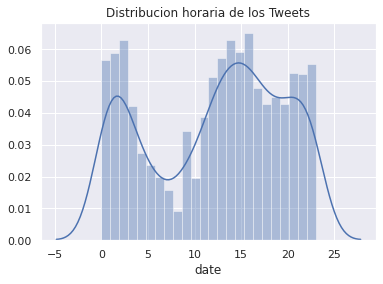

In [19]:
sns.set()# Ploteo el historigrama dividido en 24 horas para ver cuando se twittea
sns.distplot(df2["date"].dt.hour, bins=24)
plt.title("Distribucion horaria de los Tweets")
#plt.savefig('./imagenes/distribucion_horaria_tweets.png')
plt.show()

#### Observamos que la distribucion de los tweets se da de 00:00 a 03:00 y de 12:00 a 15:00, las horas mas activas son los extremos de este intervalo.

### Compongo dos columnas nuevas con el numero de palabras y la longitud de caracteres utilizados, seran utiles en el futuro

In [21]:
df2["longitud_mensaje"] = df2["message"].str.len()
df2["palabras"] = df2["message"].str.split().str.len()
display(df2[['longitud_mensaje','palabras']])

longitud_mensaje  palabras
0                  140        18
1                  144        17
2                  133        15
3                  140        23
4                  139        17
...                ...       ...
2499               140        23
2500               140        19
2501               140        20
2502                80         9
2503               140        17

[2504 rows x 2 columns]

In [22]:
## Defino una funcion que extrae las arroba o los hashtaghs# del mensaje, ademas del https/ww, ademas de tokenizar
## lematizar (¿?) las palabras, pongo stop words que ayuda a depurar el mensaje eliminando palabras que a priori
## no aportan nada de utilidad o contenido, las palabras pasaran todas a estar en minuscula.

In [23]:
def process_tweets(tweet):
    
    # Remove links
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    
    # Remove mentions and hashtag
    tweet = re.sub(r'\@\w+|\#','', tweet)
    
    # Tokenize the words
    tokenized = word_tokenize(tweet)

    # Remove the stop wordsGuardo
    tokenized = [token for token in tokenized if token not in stopwords.words("english")] 

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokenized = [lemmatizer.lemmatize(token, pos='a') for token in tokenized]

    # Remove non-alphabetic characters and keep the words contains three or more letters
    tokenized = [token for token in tokenized if token.isalpha() and len(token)>2]
    # Fit and transform the vectorizer
    return tokenized
df2["refinado"] = df2["message"].str.lower().apply(process_tweets)

display(df2[["refinado"]].head(15))

refinado
0   [filled, pocketskids, familyharris, unqualifie...
1   [supporting, means, packing, supreme, court, l...
2   [nancy, pelosi, nuts, joe, biden, kamala, harr...
3   [stopping, american, trinity, train, biden, ha...
4   [britons, also, pumped, relentless, diet, nega...
5   [presidential, debate, officially, cancelled, ...
6   [behave, tit, trump, tactic, debate, drown, bi...
7   [joe, biden, surging, battle, white, house, le...
8   [know, exactly, getting, donald, trump, clue, ...
9   [looks, like, running, scared, bag, tricks, in...
10  [would, vote, right, republican, current, form...
11  [sleepyjoebiden, remember, last, time, wiped, ...
12  [count, potato, like, smell, toddlers, hair, j...
13  [honest, understand, framing, vote, vote, dona...
14  [channel, watching, fox, maybe, watch, debate,...

### Tf-idf (Term Frequency — Inverse Term Frequency)
![alt text](https://miro.medium.com/max/505/0*oacXK7VlaV2Usteq.png)

### Creo una matriz de 0 y 1 con las palabras para 

In [24]:
tfidfstops=stopwords.words('english')

vectorizer = TfidfVectorizer(max_features=5000, stop_words= tfidfstops, tokenizer=process_tweets)
print(vectorizer)
tfidf_matrix = vectorizer.fit_transform(df2['message'])
display(tfidf_matrix)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(),columns= vectorizer.get_feature_names())
tfidf_df.head()

TfidfVectorizer(max_features=5000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function process_tweets at 0x7fafef4fd040>)


/home/danielgarcia/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['could', 'might', 'must', 'need', 'sha', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


<2504x3925 sparse matrix of type '<class 'numpy.float64'>'
	with 19868 stored elements in Compressed Sparse Row format>

abc  abd  ability  able  abortion  aboutpotus  absence  absentee  \
0  0.0  0.0      0.0   0.0       0.0         0.0      0.0       0.0   
1  0.0  0.0      0.0   0.0       0.0         0.0      0.0       0.0   
2  0.0  0.0      0.0   0.0       0.0         0.0      0.0       0.0   
3  0.0  0.0      0.0   0.0       0.0         0.0      0.0       0.0   
4  0.0  0.0      0.0   0.0       0.0         0.0      0.0       0.0   

   absolutely  abt  ...  yhe  yikes  york  young  youtube  yrs  yup  zealand  \
0         0.0  0.0  ...  0.0    0.0   0.0    0.0      0.0  0.0  0.0      0.0   
1         0.0  0.0  ...  0.0    0.0   0.0    0.0      0.0  0.0  0.0      0.0   
2         0.0  0.0  ...  0.0    0.0   0.0    0.0      0.0  0.0  0.0      0.0   
3         0.0  0.0  ...  0.0    0.0   0.0    0.0      0.0  0.0  0.0      0.0   
4         0.0  0.0  ...  0.0    0.0   0.0    0.0      0.0  0.0  0.0      0.0   

   zero  zoom  
0   0.0   0.0  
1   0.0   0.0  
2   0.0   0.0  
3   0.0   0.0  
4   0.0   0.0  

[5 rows x 3925 columns]

In [25]:
df2['refinado']

0       [filled, pocketskids, familyharris, unqualifie...
1       [supporting, means, packing, supreme, court, l...
2       [nancy, pelosi, nuts, joe, biden, kamala, harr...
3       [stopping, american, trinity, train, biden, ha...
4       [britons, also, pumped, relentless, diet, nega...
                              ...                        
2499    [great, debate, donald, trump, joe, biden, int...
2500    [undecided, voters, big, spreader, misinformat...
2501    [chris, wallace, went, donald, trump, debate, ...
2502                            [something, good, change]
2503                       [wanted, economy, closed, say]
Name: refinado, Length: 2504, dtype: object

## Guardo el dataset filtrado

In [26]:
df2.to_csv("./Outputs/FilteredDataSet.csv", index=False)

In [27]:
tweets_filtrados = pd.read_csv("./Outputs/FilteredDataSet.csv", parse_dates=["date"])

In [28]:
tweets_filtrados

date        user_name                    user_loc  \
0    2020-10-10 11:41:36  susanha77835097                Florida, USA   
1    2020-10-10 11:19:05       tomborelli               Greenwich, CT   
2    2020-10-10 09:39:10    John_Di_Lemme              (561) 847-3467   
3    2020-10-10 08:39:14      Parnell_100              United Kingdom   
4    2020-10-10 07:18:33         sqlblues  Weston-super-Mare, England   
...                  ...              ...                         ...   
2499 2020-10-01 14:17:27        JojoAkoto            Louvain-La-Neuve   
2500 2020-10-01 14:17:12    Crackerthe4th           Chicago, Illinois   
2501 2020-10-01 14:13:16  ThomasCagganel1                  Monroe, CT   
2502 2020-10-01 14:12:24             Hal4              Washington, DC   
2503 2020-10-01 14:08:29       SmarshMary               United States   

                                                message  \
0     @blossomingabyss @JoeBiden He filled his pocke...   
1     Supporting @JoeBiden means packing the Supreme...   
2     @ABC13News @realDonaldTrump @JoeBiden Nancy Pe...   
3     @JoeBiden There is NO STOPPING this AMERICAN T...   
4     @FenrirWolf26 @Stanhope2011VJ Britons have als...   
...                                                 ...   
2499  Great debate between Donald Trump and Joe Bide...   
2500  To all the undecided voters: the biggest sprea...   
2501  @thebradfordfile Chris Wallace went after Dona...   
2502  https://t.co/faYZgsey1P Something #good for a ...   
2503  @digwarrior4kids @JeSuisASDAR @JoeBiden @Speak...   

                                 full_name         country country_code  \
0                    Sunny Isles Beach, FL   United States           US   
1                            Greenwich, CT   United States           US   
2                      West Palm Beach, FL   United States           US   
3                Belfast, Northern Ireland  United Kingdom           GB   
4               Weston-super-Mare, England  United Kingdom           GB   
...                                    ...             ...          ...   
2499  Ottignies-Louvain-la-Neuve, Belgique         Belgium           BE   
2500                           Chicago, IL   United States           US   
2501                            Monroe, CT   United States           US   
2502                        Washington, DC   United States           US   
2503                      Kendall Park, NJ   United States           US   

                     geo_code  longitud_mensaje  palabras  \
0     [-80.125071  25.92906 ]               140        18   
1     [-73.63941   41.050217]               144        17   
2     [-80.12262   26.721896]               133        15   
3       [-5.928413 54.595869]               140        23   
4       [-2.94513  51.346796]               139        17   
...                       ...               ...       ...   
2499    [ 4.570091 50.672781]               140        23   
2500  [-87.732013  41.833584]               140        19   
2501  [-73.236212  41.34069 ]               140        20   
2502  [-77.014398  38.898603]                80         9   
2503  [-74.563799  40.413908]               140        17   

                                               refinado  
0     ['filled', 'pocketskids', 'familyharris', 'unq...  
1     ['supporting', 'means', 'packing', 'supreme', ...  
2     ['nancy', 'pelosi', 'nuts', 'joe', 'biden', 'k...  
3     ['stopping', 'american', 'trinity', 'train', '...  
4     ['britons', 'also', 'pumped', 'relentless', 'd...  
...                                                 ...  
2499  ['great', 'debate', 'donald', 'trump', 'joe', ...  
2500  ['undecided', 'voters', 'big', 'spreader', 'mi...  
2501  ['chris', 'wallace', 'went', 'donald', 'trump'...  
2502                    ['something', 'good', 'change']  
2503             ['wanted', 'economy', 'closed', 'say']  

[2504 rows x 11 columns]

### Buscar info

In [29]:
from sklearn.metrics.pairwise import cosine_similarity as cos
dist=1-cos(tfidf_matrix)

dist.shape
#leer que carajo es esto

(2504, 2504)

In [30]:
'''

# plot word frequency distribution of first few words
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(df2.message)
fd.plot(25,cumulative=False)

# log-log plot
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.loglog(word_counts, linestyle='-', linewidth=10)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')'''

'\n\n# plot word frequency distribution of first few words\nplt.title(\'Top 25 most common words\')\nplt.xticks(fontsize=13, rotation=90)\nfd = nltk.FreqDist(df2.message)\nfd.plot(25,cumulative=False)\n\n# log-log plot\nword_counts = sorted(Counter(all_words).values(), reverse=True)\nplt.loglog(word_counts, linestyle=\'-\', linewidth=10)\nplt.ylabel("Freq")\nplt.xlabel("Word Rank")\nplt.title(\'log-log plot of words frequency\')'

### De la columna de geo cordenadas extraigo la latidud y la longitud 

In [31]:
tweets_filtrados['latitud'],tweets_filtrados['longitud']=zip(*df2['geo_code'])
tweets_filtrados.head()

date        user_name                    user_loc  \
0 2020-10-10 11:41:36  susanha77835097                Florida, USA   
1 2020-10-10 11:19:05       tomborelli               Greenwich, CT   
2 2020-10-10 09:39:10    John_Di_Lemme              (561) 847-3467   
3 2020-10-10 08:39:14      Parnell_100              United Kingdom   
4 2020-10-10 07:18:33         sqlblues  Weston-super-Mare, England   

                                             message  \
0  @blossomingabyss @JoeBiden He filled his pocke...   
1  Supporting @JoeBiden means packing the Supreme...   
2  @ABC13News @realDonaldTrump @JoeBiden Nancy Pe...   
3  @JoeBiden There is NO STOPPING this AMERICAN T...   
4  @FenrirWolf26 @Stanhope2011VJ Britons have als...   

                    full_name         country country_code  \
0       Sunny Isles Beach, FL   United States           US   
1               Greenwich, CT   United States           US   
2         West Palm Beach, FL   United States           US   
3   Belfast, Northern Ireland  United Kingdom           GB   
4  Weston-super-Mare, England  United Kingdom           GB   

                  geo_code  longitud_mensaje  palabras  \
0  [-80.125071  25.92906 ]               140        18   
1  [-73.63941   41.050217]               144        17   
2  [-80.12262   26.721896]               133        15   
3    [-5.928413 54.595869]               140        23   
4    [-2.94513  51.346796]               139        17   

                                            refinado    latitud   longitud  
0  ['filled', 'pocketskids', 'familyharris', 'unq... -80.125071  25.929060  
1  ['supporting', 'means', 'packing', 'supreme', ... -73.639410  41.050217  
2  ['nancy', 'pelosi', 'nuts', 'joe', 'biden', 'k... -80.122620  26.721896  
3  ['stopping', 'american', 'trinity', 'train', '...  -5.928413  54.595869  
4  ['britons', 'also', 'pumped', 'relentless', 'd...  -2.945130  51.346796

### Puesto que la mayoria de tweets son estadounidense y son los que nos interesan dividimos en estados

In [32]:
def get_state(x):
    
    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
              "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
              "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
              "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
              "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

    states_dict = {
            'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa',
            'AZ': 'Arizona','CA': 'California','CO': 'Colorado','CT': 'Connecticut',
            'DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia',
            'GU': 'Guam','HI': 'Hawaii','IA': 'Iowa','ID': 'Idaho','IL': 'Illinois',
            'IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky','LA': 'Louisiana',
            'MA': 'Massachusetts','MD': 'Maryland','ME': 'Maine','MI': 'Michigan',
            'MN': 'Minnesota','MO': 'Missouri','MP': 'Northern Mariana Islands',
            'MS': 'Mississippi','MT': 'Montana','NA': 'National','NC': 'North Carolina',
            'ND': 'North Dakota','NE': 'Nebraska','NH': 'New Hampshire','NJ': 'New Jersey',
            'NM': 'New Mexico','NV': 'Nevada','NY': 'New York','OH': 'Ohio','OK': 'Oklahoma',
            'OR': 'Oregon','PA': 'Pennsylvania','PR': 'Puerto Rico','RI': 'Rhode Island',
            'SC': 'South Carolina','SD': 'South Dakota','TN': 'Tennessee','TX': 'Texas',
            'UT': 'Utah','VA': 'Virginia','VI': 'Virgin Islands','VT': 'Vermont',
            'WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia','WY': 'Wyoming'
    }


    abv = x.split(',')[-1].lstrip().upper()
    state_name = x.split(',')[0].lstrip()
    if abv in states:
        state = abv
    else:
        if state_name in states_dict.values():
            state = list(states_dict.keys())[list(states_dict.values()).index(state_name)]
        else:
            state = 'Non_USA'    
    return state


### Creamos columna con los estados

In [33]:
tweets_filtrados['states'] = tweets_filtrados['full_name'].apply(get_state)
tweets_filtrados['states'].drop_duplicates(inplace= True)
list(tweets_filtrados['states'].head())

['FL', 'CT', 'Non_USA', 'MI', 'PA']

Text(0, 0.5, 'Origen de los Tweets')

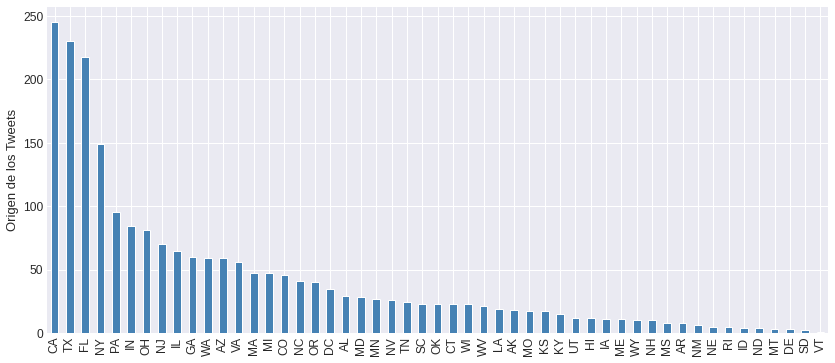

In [34]:
plt.style.use('seaborn-darkgrid')
tweets_filtrados_states = tweets_filtrados[tweets_filtrados.country=='United States']
tweets_filtrados_states = tweets_filtrados_states[tweets_filtrados_states.states!='Non_USA']

x = tweets_filtrados_states.states.value_counts()
x.plot(kind='bar',figsize=(14,6),fontsize=12,color='steelblue')
plt.ylabel('Origen de los Tweets', fontsize=13)
#plt.savefig('./imagenes/Origen_por_estado_tweets.png')


# Representacion interactiva mapa folium.

In [203]:
mapa1 = folium.Map(
    location=[25.92906,-80.125071],
    tiles='cartodbpositron',
    zoom_start=12,
)
tweets_filtrados.apply(lambda row:folium.CircleMarker(location=[row["longitud"], row["latitud"]], popup=row[['user_name','message']]).add_to(mapa1), axis=1)
mapa1
#map1.save("./imagenes/mapa_tweets_usuario_mensaje.html")
#Crea un mapa que nos muestra la geolocalizacion desde donde se realizaron los tweets,
#Ñapeando al invertir la latitud con la logitud salen correctamente


## Heatmap que nos permite diferenciar USA del resto y modificar la capa con la que se quiere representar el mapa.

In [108]:
from IPython.display import IFrame
from folium.plugins import  HeatMapWithTime

geoplots = []
for index, row in tweets_filtrados[['latitud','longitud','Polaridad']].iterrows():
    geoplots.append([row['longitud'],row['latitud'],row['Polaridad']])

mus = folium.Map(location=[39, -99], zoom_start=4)
plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(mus)

mus.choropleth(
    geo_data='gz_2010_us_040_00_20m.json',
    fill_color='red', 
    fill_opacity=0.1, 
    line_opacity=0.2,
    name='heat_map')
    
mus.add_child(plugins.HeatMap(geoplots,
                            name='Twitter HeatMap',
                            radius=10,
                            max_zoom=1,
                            blur=10, 
                            max_val=3.0))
folium.TileLayer('cartodbpositron').add_to(mus)
folium.TileLayer('cartodbdark_matter').add_to(mus)
folium.TileLayer('Mapbox Control Room').add_to(mus)
folium.LayerControl().add_to(mus)
#mus.save("./imagenes/twitter_us_HEAT_map.html") 
IFrame('twitter_us_map.html', width=960, height=520)

## Representacion frecuencias palabras mas usadas.

In [35]:


# Crear un nuevo DataFrame llamado frequencies
frequencies = pd.DataFrame(tfidf_matrix.sum(axis=0).T,index=vectorizer.get_feature_names(),columns=['total_frequency'])

# Ordenarlo por frecuencia
frequencies.sort_values(by='total_frequency',ascending=False, inplace=True)
# Display las 20 palabras + frecuentes
display(frequencies.head(20))



total_frequency
biden              165.197080
trump              141.320013
joe                138.658874
donald              93.832492
debate              59.657626
president           49.312345
vote                46.799099
news                40.207509
covid               37.189273
good                36.214084
hearing             32.420388
unfortunate         32.232752
man                 31.163067
would               29.864252
since               27.447030
still               26.154188
presidential        26.047605
contracting         24.630076
upon                24.411668
aboutpotus          23.849189

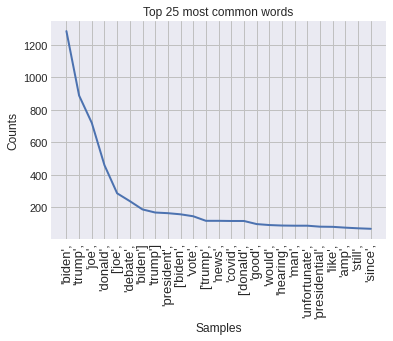

Text(0.5, 1.0, 'log-log plot of words frequency')

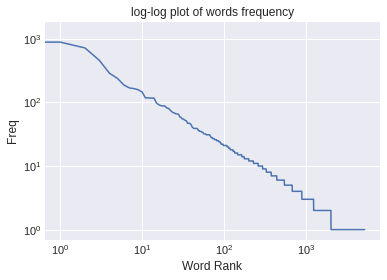

In [36]:
all_words = []
for line in list(tweets_filtrados['refinado']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(10)

# plot word frequency distribution of first few words
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

# log-log plot
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')


# Representacion Wordcloud.

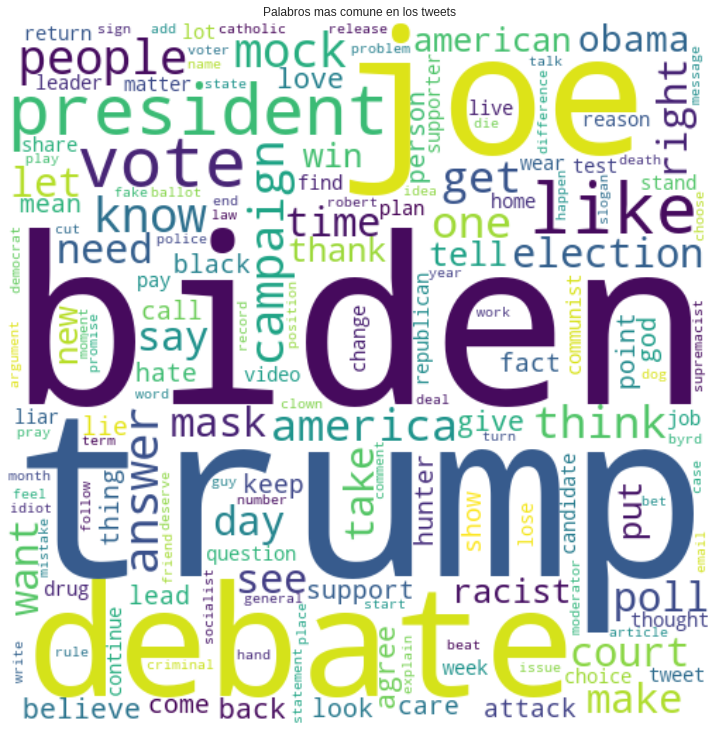

In [37]:


# Unir los indexes
frequent_words = " ".join(frequencies.index)+" "

# Inicializar word cloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, max_words=2000, background_color ='white', stopwords= tfidfstops)

# Generar world clouds for each type of label
tweets_wc = wc.generate(frequent_words)

# Plot worldcloud                     
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(tweets_wc, interpolation="bilinear") 
plt.axis("off") 
plt.title("Palabros mas comune en los tweets")
#plt.savefig('./imagenes/wordcloudo.png', facecolor='k', bbox_inches='tight')
plt.tight_layout(pad = 0) 
plt.show()



## Mismo wordcloud pero utilizando una mascara con la bandera de usa

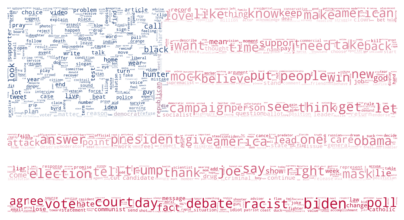

In [38]:
# crear mascara para utilizar la bandera yankee
mask = np.array(Image.open("usa.png"))
wordcloud_usa = WordCloud(stopwords=tfidfstops, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(frequent_words)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

#plt.savefig("./imagenes/usa_flag.png", format="png")

plt.show()

### Tras componer varios graficos, exponer de dos formas el wordcloud de palabras mas utilizadas y demases vamos a representar el analisis de sentimientos.

# Analisis de sentimientos.

In [39]:
tweets_filtrados["Polaridad"] = tweets_filtrados["refinado"].apply(lambda word: TextBlob(word).sentiment.polarity)
tweets_filtrados["Subjetividad"] = tweets_filtrados["refinado"].apply(lambda word: TextBlob(word).sentiment.subjectivity)

# Display Polaridad y al Subjetividad
display(tweets_filtrados[["Polaridad","Subjetividad"]].head(10))

Polaridad  Subjetividad
0   0.400000      0.900000
1   0.250000      0.250000
2   0.000000      0.000000
3   0.000000      0.000000
4  -0.300000      0.400000
5   0.000000      0.000000
6   0.000000      0.000000
7  -0.083333      0.033333
8  -0.025000      0.325000
9   0.000000      0.000000

In [40]:
def analizar_polaridad(polaridad):
    if polaridad > 0:
        return "Positiva"
    if polaridad == 0:
        return "Neutral"
    if polaridad < 0:
        return "Negativa"

tweets_filtrados["Label"] = tweets_filtrados["Polaridad"].apply(analizar_polaridad)

# Display analisis de polaridad y subjetividad diferenciado en tres niveles: positivo, negativo y neutro
display(tweets_filtrados[["Label"]].head(10))

Label
0  Positiva
1  Positiva
2   Neutral
3   Neutral
4  Negativa
5   Neutral
6   Neutral
7  Negativa
8  Negativa
9   Neutral

### Sorprendentemente hay mas tweets neutrales que positivos o negativos


In [41]:
print(tweets_filtrados["Label"].value_counts())

Neutral     1158
Positiva     787
Negativa     559
Name: Label, dtype: int64


### Visualizar el recuento total de labels segmentado por los tipos de positividad, representando asi lo expuesto anteriormente.


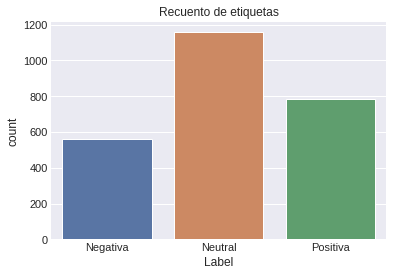

In [42]:
tweets_filtrados["Label"] = tweets_filtrados["Label"].astype("category")

# Visualizar el recuento total de labels segmentado por los tipos de positividad 
sns.countplot(tweets_filtrados["Label"])
plt.title("Recuento de etiquetas")
#plt.savefig('./imagenes/recuento_de_etiquetas.png')
plt.show()


In [78]:
 #Visualizar las puntuaciones de la polaridad con un scatterplot

plt.figure(figsize = (10, 10)) 
sns.scatterplot(x="Polaridad", y="Subjetividad", hue="Label", data=tweets_filtrados)
plt.title("Subjectivity vs Polarity")
plt.show()
print(tweets_filtrados.Polaridad.shape)
print(tweets_filtrados.Subjetividad.shape)
print(tweets_filtrados.Label.shape)

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 720x720 with 1 Axes>

(2504,)
(2504,)
(2504,)


## Extraer hastagh para plotear busquedas relacionadas

In [44]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
#Funcion para extraer hastaghs

HT_positive = hashtag_extract(df2['message'][tweets_filtrados['Label'] == 1])
HT_negative = hashtag_extract(df2['message'][tweets_filtrados['Label'] == -1])
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])
print(HT_positive)
print(HT_negative)

a = nltk.FreqDist(HT_negative)
print(a)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
print(d)
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

[]
[]
<FreqDist with 0 samples and 0 outcomes>
Empty DataFrame
Columns: [Hashtag, Count]
Index: []


ValueError: min() arg is an empty sequence

<Figure size 1152x360 with 0 Axes>

## Wordcloud con sentimiento.

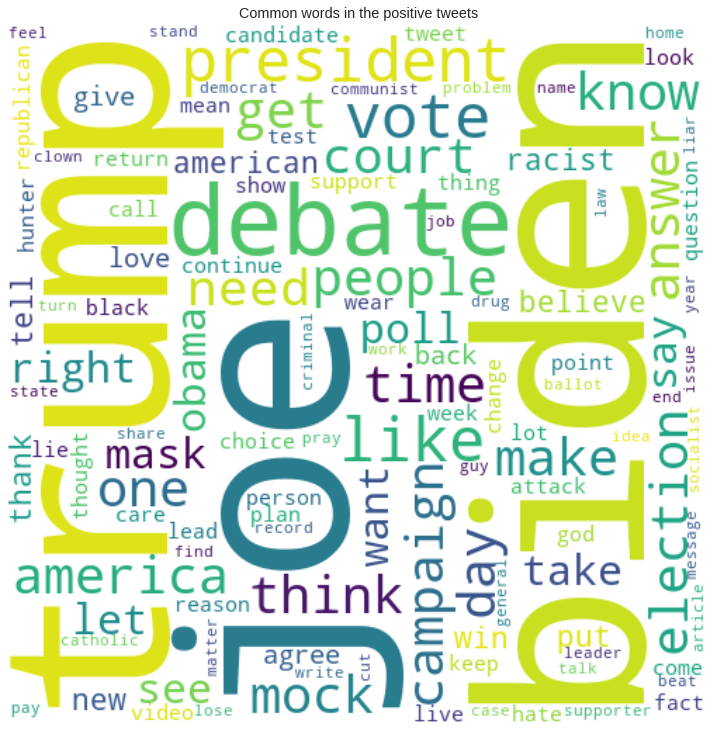

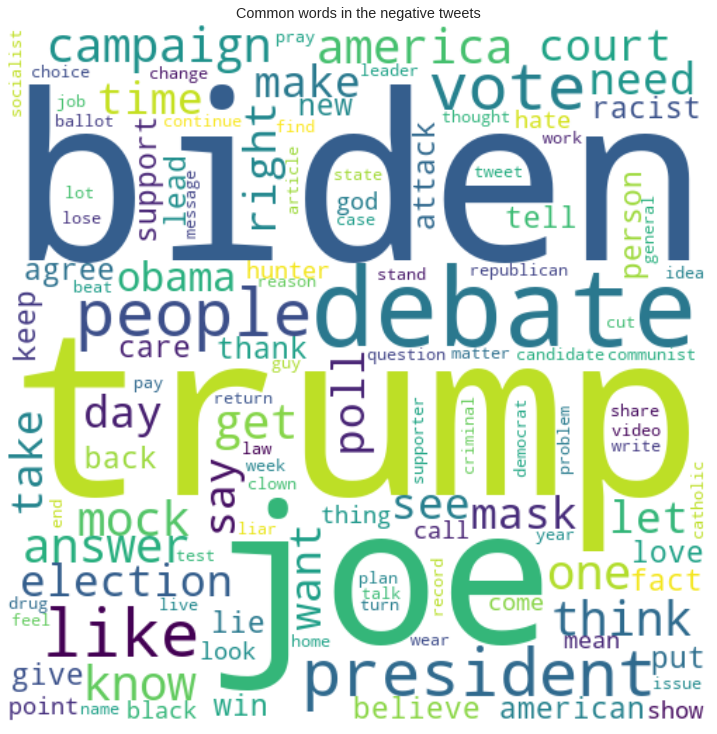

In [73]:
def make_wordcloud(data, label):

    # Initialize a Tf-idf Vectorizer
    polarity_vectorizer = TfidfVectorizer(max_features=5000, stop_words= tfidfstops)

    # Fit and transform the vectorizer
    tfidf_matrix_polarity = polarity_vectorizer.fit_transform(tweets_filtrados["refinado"])

    # Create a new DataFrame called frequencies
    frequencies_polarity = pd.DataFrame(tfidf_matrix_polarity.sum(axis=0).T,index=polarity_vectorizer.get_feature_names(),columns=['total_frequency'])

    # Sort the words by frequency
    frequencies_polarity.sort_values(by='total_frequency',ascending=False, inplace=True)

    # Join the indexes
    frequent_words_polarity = " ".join(frequencies_polarity.index)+" "

    # Initialize the word cloud
    wc = WordCloud(width = 500, height = 500, min_font_size = 10, max_words=2000, background_color ='white', stopwords= tfidfstops)

    # Generate the world clouds for each type of label
    tweets_polarity = wc.generate(frequent_words_polarity)

    # Plot the world cloud                     
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(tweets_polarity, interpolation="bilinear") 
    plt.axis("off") 
    plt.title("Common words in the " + label +" tweets")
    plt.tight_layout(pad = 0)
    plt.show() 

# Create DataFrames for each label
positive_popular_df = tweets_filtrados.sort_values(by=["Polaridad"], axis=0, ascending=[False])[["Polaridad","message","refinado"]].head(50)
negative_popular_df = tweets_filtrados.sort_values(by=["Polaridad"], axis=0, ascending=[False])[["Polaridad","message","refinado"]].tail(50)

# Call the function
make_wordcloud(positive_popular_df, "positive")
make_wordcloud(negative_popular_df, "negative")


### Numero de tweets por paises separados por su positividad.

In [47]:
positives_by_country = tweets_filtrados[tweets_filtrados.country!='UNKNOWN'].groupby("Label")["country"].value_counts().Positiva.sort_values(ascending=False)
negatives_by_country =tweets_filtrados[tweets_filtrados.country!='UNKNOWN'].groupby("Label")["country"].value_counts().Negativa.sort_values(ascending=False)

# Print them out
print("Positive \n")
print(positives_by_country)
print("\nNegative\n")
print(negatives_by_country)


Positive 

country
United States                  682
United Kingdom                  30
Canada                          19
India                            6
Mexico                           6
Australia                        4
Indonesia                        4
Nigeria                          3
Ireland                          2
Italy                            2
Norway                           2
Singapore                        2
Spain                            2
Sweden                           2
Bangladesh                       1
Aruba                            1
The Netherlands                  1
Tanzania                         1
Botswana                         1
Brazil                           1
Cayman Islands                   1
Costa Rica                       1
Cyprus                           1
Germany                          1
Greece                           1
Hong Kong                        1
Kenya                            1
People's Republic of China       1
P

### Observamos como el debate se circunscribe casi en su mayoria a USA y es residual en el resto del mundo, estando formado el top3 por USA, su pais matriz(UK) y su vecina Canada, todos del ambito anglosajon

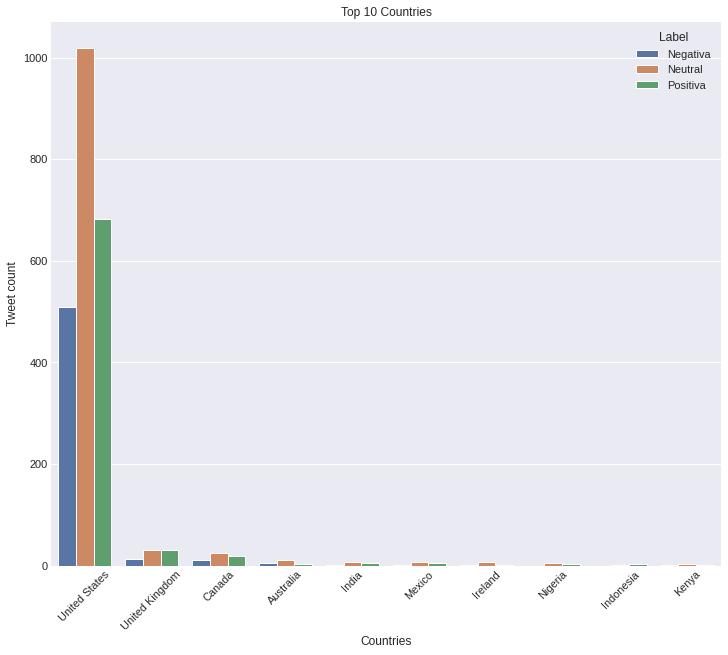

In [48]:
countries = tweets_filtrados[tweets_filtrados.country!='UNKNOWN']
top_countries = countries["country"].value_counts(sort=True).head(20)

mask = tweets_filtrados["country"].isin(top_countries.index[:10]).values

# Create a new DataFrame only includes top10 country
top_20df = tweets_filtrados.iloc[mask,:]

# Visualize the top 20 countries
plt.figure(figsize=(12,10))
sns.countplot(x="country", hue="Label", data=top_20df, order=top_20df["country"].value_counts().index)
plt.xlabel("Countries")
locs, labels = plt.xticks()
plt.xticks(locs, country_fullnames[:10])
plt.xticks(rotation=45)
plt.ylabel("Tweet count")
plt.title("Top 10 Countries")
plt.show()
#plt.savefig('./imagenes/top10paises.png')


### Comparativa de tweets positivos vs negativos en base al nº de palabras utilizadas

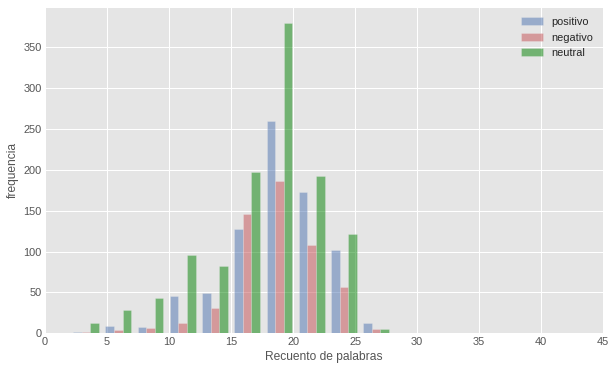

In [49]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option("display.max_colwidth", 200) 

x = tweets_filtrados['palabras'][tweets_filtrados.Polaridad > 0]
y = tweets_filtrados['palabras'][tweets_filtrados.Polaridad < 0]
z = tweets_filtrados['palabras'][tweets_filtrados.Polaridad == 0]
plt.xlim(0,45)
plt.xlabel('Recuento de palabras')
plt.ylabel('frequencia')
g = plt.hist([x, y,z], color=['b','r','green'], alpha=0.5, label=['positivo','negativo', 'neutral'])
plt.legend(loc='upper right');
plt.savefig('./imagenes/Recuento_palabras_sentimientos.png')



## Añademos una capa de profundidad al analis al comparar mensajes positivos y negativos con las horas a las que se realizo.


### Vemos como las 09:00 am posee una especial incidencia negativa, a la gente no le gusta hablar de politica recien despiertos (menos si ers Federico Jimenez Losantos)

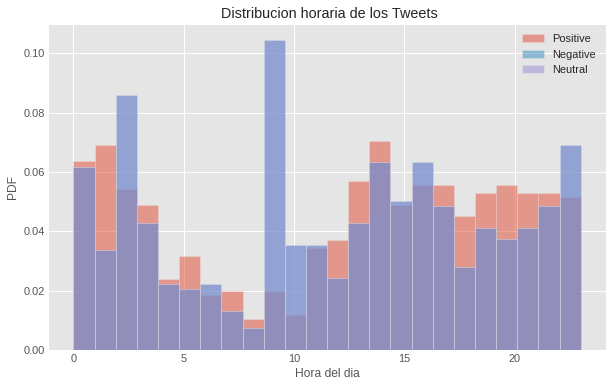

In [75]:
positive = tweets_filtrados.loc[tweets_filtrados.Label=="Positiva"]["date"].dt.hour
negative = tweets_filtrados.loc[tweets_filtrados.Label=="Negativa"]["date"].dt.hour
neutral = tweets_filtrados.loc[tweets_filtrados.Label=="Neutral"]["date"].dt.hour

plt.hist(positive, alpha=0.5, bins=24, label="Positive", density=True)
plt.hist(negative, alpha=0.5, bins=24, label="Negative", density=True)
plt.hist(negative, alpha=0.5, bins=24, label="Neutral", density=True)
plt.xlabel("Hora del dia")
plt.ylabel("PDF")
plt.title(" Distribucion horaria de los Tweets")
plt.legend(loc='upper right')
plt.savefig('./imagenes/Distribucion_sentimientos_horario.png')
plt.show()


In [160]:
tweets_filtrados.to_csv("./Outputs/sentimentos_tweeteros.csv", index=False)